In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("drug200.csv")

In [4]:
display(df)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [5]:
df.shape

(200, 6)

In [6]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [7]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


Text(0.5, 1.0, 'GENDER')

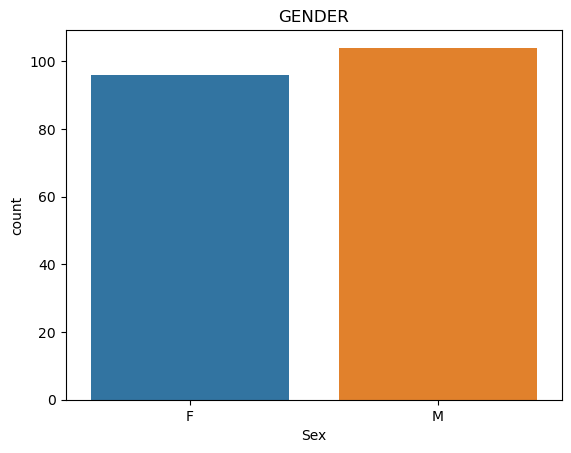

In [10]:
sns.countplot(x=df['Sex'])
plt.title("GENDER")

Text(0.5, 1.0, 'BLOOD PRESSURE')

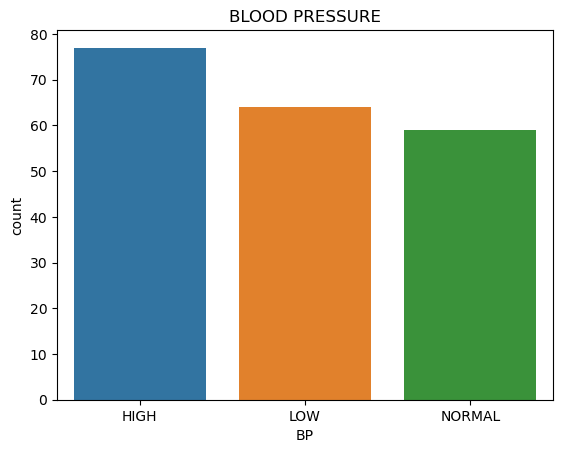

In [11]:
sns.countplot(x=df['BP'])
plt.title("BLOOD PRESSURE")

Text(0.5, 1.0, 'CHOLESTEROL')

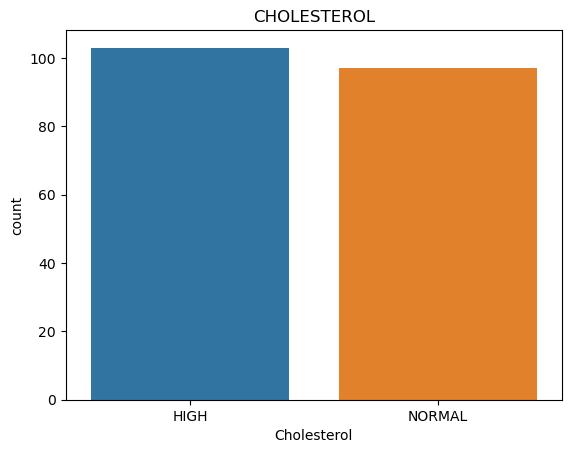

In [14]:
sns.countplot(x=df['Cholesterol'])
plt.title("CHOLESTEROL")

Text(0.5, 1.0, 'DRUGS')

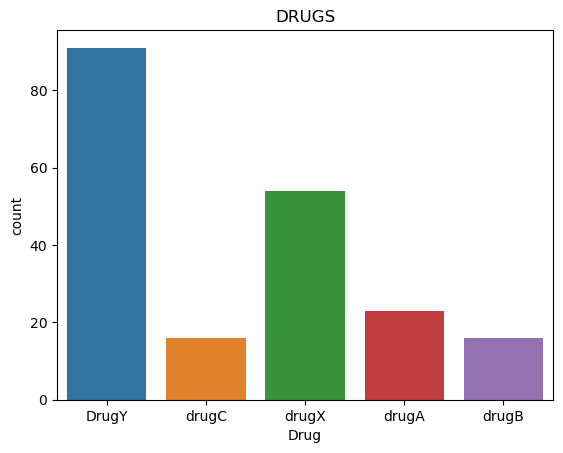

In [15]:
sns.countplot(x=df['Drug'])
plt.title("DRUGS")

In [16]:
from sklearn.preprocessing import OrdinalEncoder

In [17]:
en=OrdinalEncoder()

In [18]:
a=['Drug']
b=['Cholesterol']
c=['BP']
d=['Sex']

In [19]:
df[a]=en.fit_transform(df[a])
df[b]=en.fit_transform(df[b])
df[c]=en.fit_transform(df[c])
df[d]=en.fit_transform(df[d])

In [20]:
df=df.astype({'Sex':'int','BP':'int','Cholesterol':'int','Drug':'int'})

In [21]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0
...,...,...,...,...,...,...
195,56,0,1,0,11.567,3
196,16,1,1,0,12.006,3
197,52,1,2,0,9.894,4
198,23,1,2,1,14.020,4


In [22]:
cor=df.corr()

In [23]:
cor.style.background_gradient()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
Age,1.000000,0.102027,0.054212,-0.068234,-0.063119,0.041856
Sex,0.102027,1.000000,-0.007814,-0.008811,-0.125008,0.018239
BP,0.054212,-0.007814,1.000000,-0.137552,-0.149312,0.419397
Cholesterol,-0.068234,-0.008811,-0.137552,1.000000,0.010000,0.048415
Na_to_K,-0.063119,-0.125008,-0.149312,0.010000,1.000000,-0.689051
Drug,0.041856,0.018239,0.419397,0.048415,-0.689051,1.000000


<AxesSubplot:xlabel='Age', ylabel='BP'>

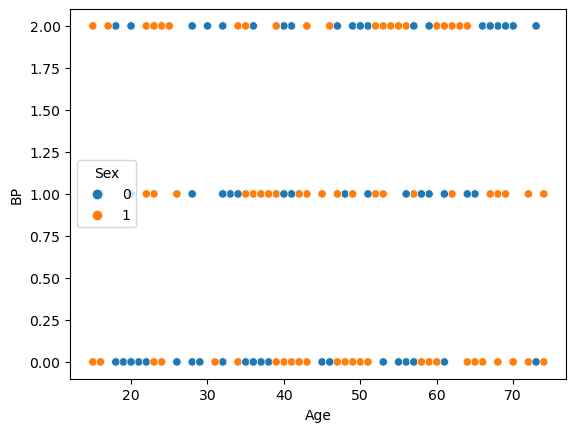

In [24]:
sns.scatterplot(data=df,x=df['Age'],y=df['BP'],hue=df['Sex'])

<AxesSubplot:xlabel='Age', ylabel='Cholesterol'>

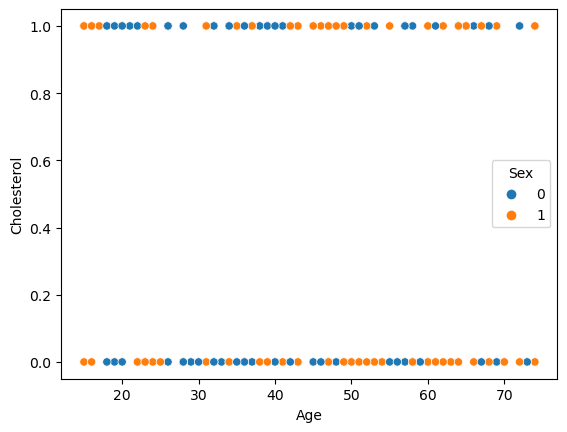

In [25]:
sns.scatterplot(data=df,x=df['Age'],y=df['Cholesterol'],hue=df['Sex'])

In [34]:
from sklearn.model_selection import train_test_split

In [36]:
x=df.iloc[:,0:5]
y=df['Drug']

In [37]:
xtr,xts,ytr,yts=train_test_split(x,y,test_size=0.2,random_state=0)

In [38]:
xtr

,Age,Sex,BP,Cholesterol,Na_to_K
134,42,0,0,0,21.036
66,29,1,0,0,12.856
26,31,1,0,0,30.366
113,65,0,1,1,13.769
168,51,0,1,1,23.003
...,...,...,...,...,...
67,17,1,2,1,10.832
192,72,1,1,0,16.310
117,40,0,2,0,10.103
47,68,1,1,0,10.291


In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
mod=RandomForestClassifier()

In [41]:
mod.fit(xtr,ytr)

RandomForestClassifier()

In [43]:
pred=mod.predict(xts)
print(pred)

[3 4 0 0 0 4 4 4 0 4 1 0 0 0 2 3 0 0 4 0 0 4 4 4 0 0 0 0 0 4 4 3 1 4 0 0 4
 0 1 4]


In [44]:
# Evalution Metrics
from sklearn.metrics import confusion_matrix

In [46]:
# Confuse Matrix
c=confusion_matrix(yts,pred)
print("Confusion Matrix is: \n",c)

Confusion Matrix is: 
 [[19  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  1  0  0]
 [ 0  0  0  3  0]
 [ 0  0  0  0 14]]


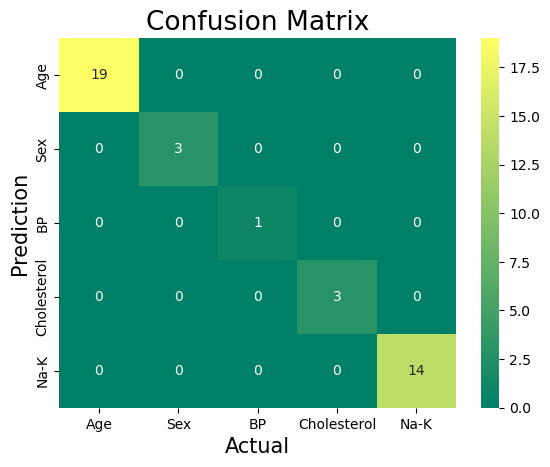

In [49]:
sns.heatmap(c,annot=True,fmt='g',cmap='summer',xticklabels=['Age','Sex','BP','Cholesterol','Na-K'],yticklabels=['Age','Sex','BP','Cholesterol','Na-K'])
plt.xlabel('Actual',fontsize=15)
plt.ylabel('Prediction',fontsize=15)
plt.title("Confusion Matrix",fontsize=19)
plt.show()

In [59]:
# Accuracy Checking.
from sklearn.metrics import accuracy_score

In [57]:
acc=accuracy_score(yts,pred)
print("Accuracy is:",acc*100)

Accuracy is: 100.0
